Epoch 1/5
157/157 [==============================] - 99s 620ms/step - loss: 0.6792 - accuracy: 0.5611 - val_loss: 0.6385 - val_accuracy: 0.6364
Epoch 2/5
157/157 [==============================] - 84s 533ms/step - loss: 0.5355 - accuracy: 0.7364 - val_loss: 0.4501 - val_accuracy: 0.8030
Epoch 3/5
157/157 [==============================] - 98s 623ms/step - loss: 0.4037 - accuracy: 0.8210 - val_loss: 0.5725 - val_accuracy: 0.6948
Epoch 4/5
157/157 [==============================] - 176s 1s/step - loss: 0.4055 - accuracy: 0.8241 - val_loss: 0.5456 - val_accuracy: 0.7648
Epoch 5/5
196/196 [==============================] - 56s 287ms/step - loss: 0.4444 - accuracy: 0.8052
Epoch 1/5
157/157 [==============================] - 273s 2s/step - loss: 0.5780 - accuracy: 0.6879 - val_loss: 0.4151 - val_accuracy: 0.8004
Epoch 2/5
157/157 [==============================] - 226s 1s/step - loss: 0.3186 - accuracy: 0.8651 - val_loss: 0.3282 - val_accuracy: 0.8614
Epoch 3/5
157/157 [=====================

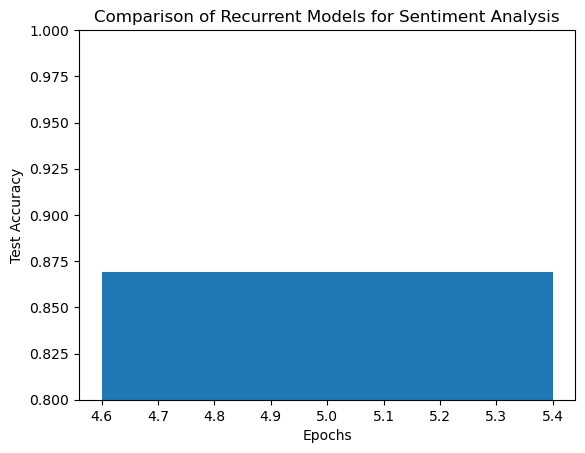

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import imdb
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, SimpleRNN, GRU, LSTM, Dense
from tensorflow.keras.preprocessing import sequence

# Set the maximum number of words to consider in the reviews
max_words = 5000

# Load the IMDB dataset
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_words)

# Pad the sequences to have the same length
max_length = 500
x_train = sequence.pad_sequences(x_train, maxlen=max_length)
x_test = sequence.pad_sequences(x_test, maxlen=max_length)

# Lists to store accuracy for each model
accuracies = []

# Models to compare
model_names = ["RNN", "GRU", "LSTM"]

models = [
    Sequential([
        Embedding(max_words, 100, input_length=max_length),
        SimpleRNN(128),
        Dense(1, activation='sigmoid')
    ]),
    Sequential([
        Embedding(max_words, 100, input_length=max_length),
        GRU(128),
        Dense(1, activation='sigmoid')
    ]),
    Sequential([
        Embedding(max_words, 100, input_length=max_length),
        LSTM(128),
        Dense(1, activation='sigmoid')
    ])
]

# Compile and train models
batch_size = 128
epochs = 5

for model in models:
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.2)
    _, accuracy = model.evaluate(x_test, y_test, batch_size=batch_size)
    accuracies.append(accuracy)

# Create a bar plot
plt.bar(epochs, accuracies)
plt.xlabel('Epochs')
plt.ylabel('Test Accuracy')
plt.title('Comparison of Recurrent Models for Sentiment Analysis')
plt.ylim(0.8, 1.0)  # Adjust the y-axis limits as needed
plt.show()